This is a demo of

# Universal Approximation Theorem of Feed Forward Neural Networks

We developed a software called SYSNet (https://github.com/mehdirezaie/SYSNet) to model and mitigate the imaging systematics (due to seeing, airmass, galactic extinction) in imaging surveys. The main methodology is described in Rezaie et al. 2019. This notebook is going to prove the main concept.

## modules
The main pipeline is implemented inside regression.py (https://github.com/mehdirezaie/LSSutils/blob/master/LSSutils/nn/regression.py) which is the main idea of SYSNet, but modified to be compatible with TensorFlow 2.x. The `regression` module has the implementation of the neural networks, while `selection` has the implementation of the backward feature elimination/selection.

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time


import sys
import os
home = os.getenv("HOME")
sys.path.append(f'{home}/github/LSSutils')


import regression   # for regression
import selection    # for feature selection
from LSSutils import setup_logging

In [4]:
setup_logging('info')

Demo 1: 
## Model Sin(x)

We want to show that a neural network can model the function sin(x). We create synthetic data based on sin(x) and train the neural network that is defined in the module `regression.py`

In [6]:
#import sys
#sys.path.append('/Users/mehdi/github/LSSutils')

# split data into train, test and validation sets
from LSSutils.utils import split2Kfolds  


def TABLE(n = 512): 
    
    # create mock data
    
    np.random.seed(1234567)
    x = np.linspace(0., 2.*np.pi, n)
    z = np.random.uniform(0, 2*np.pi, size=n)
    np.random.shuffle(x) # inplace 
    y = np.sin(x) #+ 0.2*z
    #x = x[:, np.newaxis]
    x = np.column_stack([x, z])

    n,m = x.shape
    d = np.empty(n, dtype=[('label', 'f8'), 
                            ('features', ('f8', m)),
                            ('fracgood', 'f8'),
                            ('hpind', 'i8')])
    d['label'] = y
    if m==1:
        d['features']=x.squeeze()
    else:
        d['features']=x

    d['hpind']=1.
    d['fracgood']=1.0
    return d



# make table [label, features, fracgood, hpind]
Table  = TABLE()          # make table
Data5f = split2Kfolds(Table, k=5)     # split

# take one fold for example
fold   = 'fold0'
train  = regression.Data(Data5f['train'][fold])
test   = regression.Data(Data5f['test'][fold])
valid  = regression.Data(Data5f['validation'][fold])



t_i = time.time()
Net = regression.NetRegression(train, valid, test)
Net.fit(hyperparams=True) # perform hyper-parameter training
Net._descale() # descale
t_f = time.time()

plt.figure()
plt.scatter(test.x[:,0], test.y)
plt.scatter(test.x[:,0], Net.ypreds[0]);plt.show()
plt.scatter(test.y, Net.ypreds[0]);plt.show()
print(f'took {t_f-t_i} secs')

camb is not installed!


[ 000027.22 ]   0: 04-23 12:32  NetRegression   INFO     Scale features and label


AttributeError: module 'tensorflow._api.v1.random' has no attribute 'set_seed'

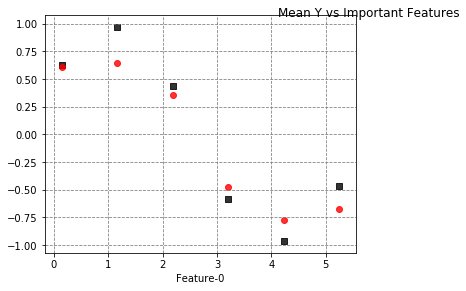

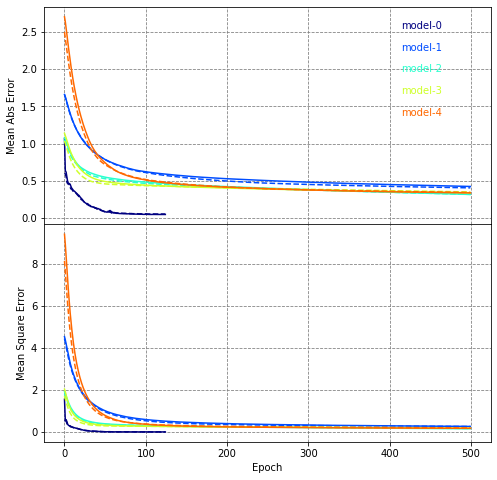

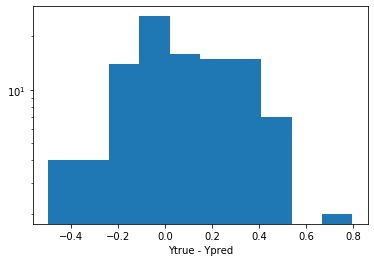

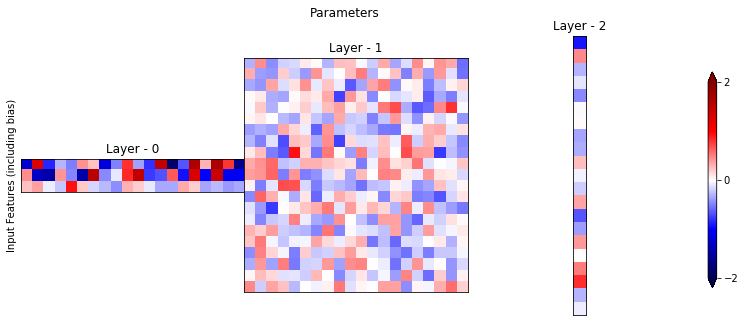

In [6]:
Net.make_plots()